<a href="https://colab.research.google.com/github/Soumyadantre/Life-expectency-using-ML/blob/main/LifeExpectancy_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

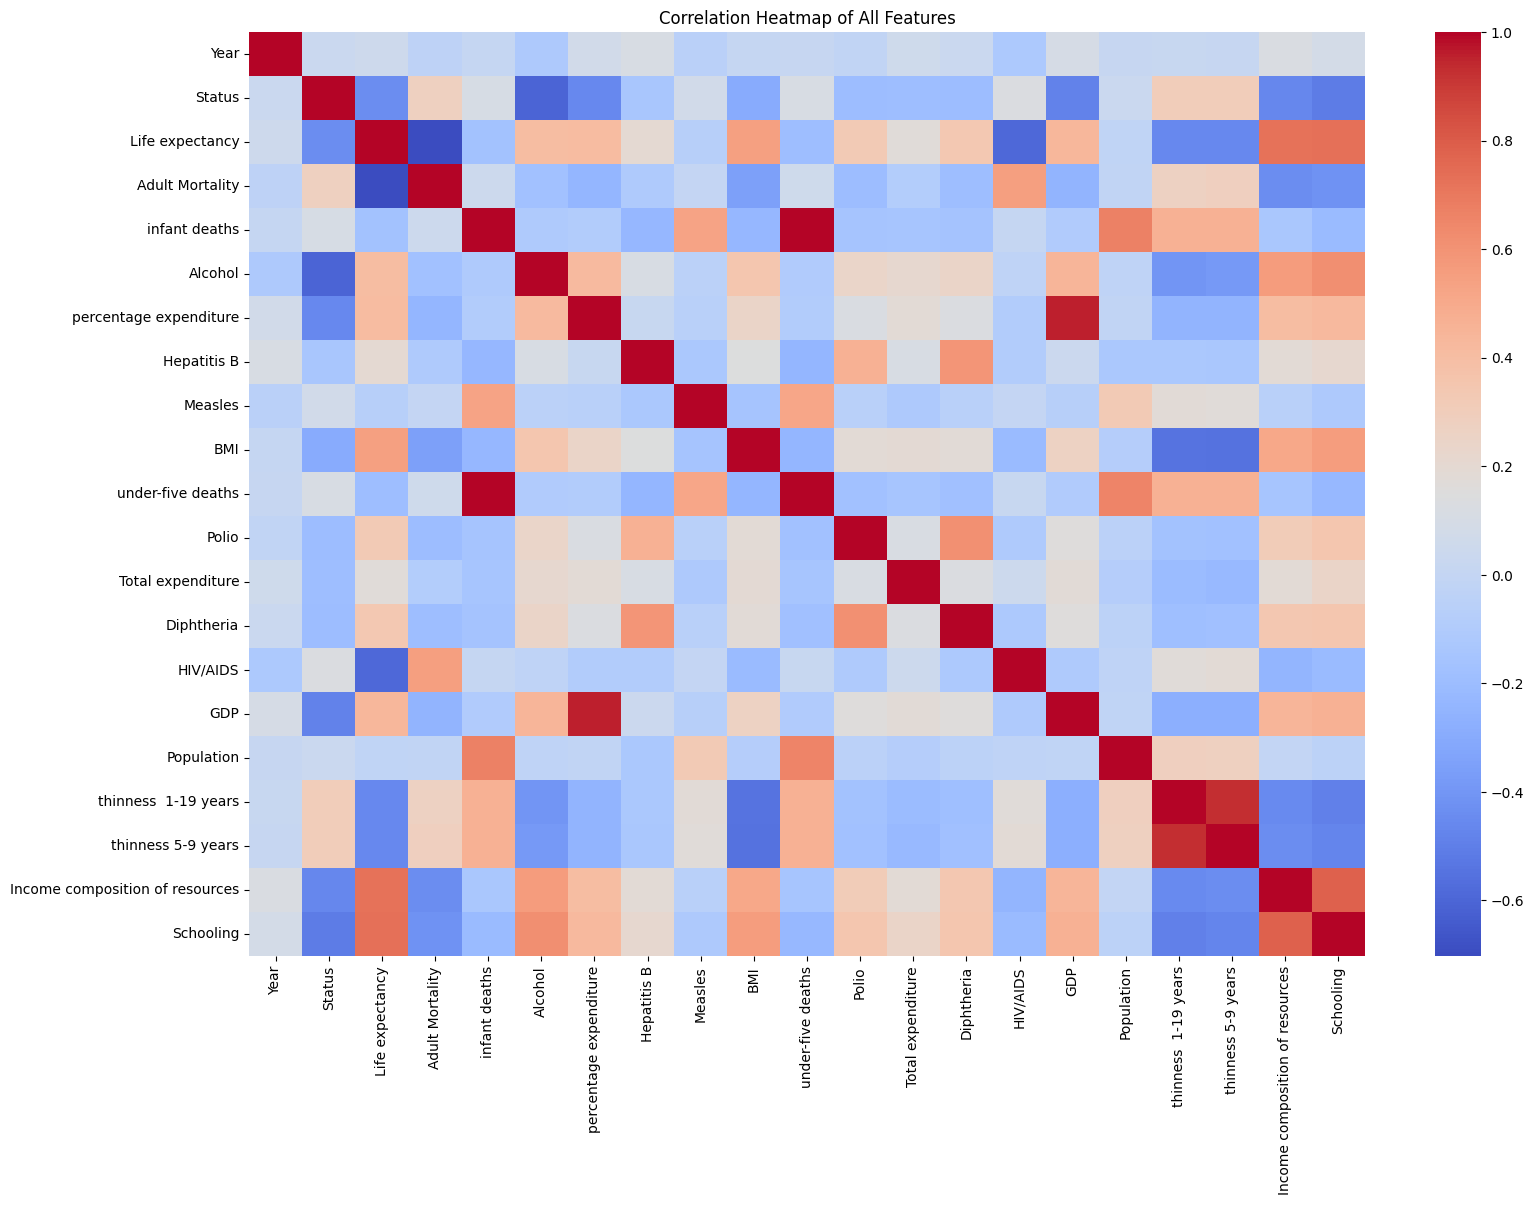


Top Features Correlated with Life Expectancy:

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
Adult Mortality                    0.702523
HIV/AIDS                           0.592236
BMI                                0.542042
thinness  1-19 years               0.457838
thinness 5-9 years                 0.457508
Status                             0.442798
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
under-five deaths                  0.192265
Total expenditure                  0.174718
infant deaths                      0.169074
Measles                            0.068881
Year                               0.050771
Population                         0.022305
Name: Life expectancy, dtype

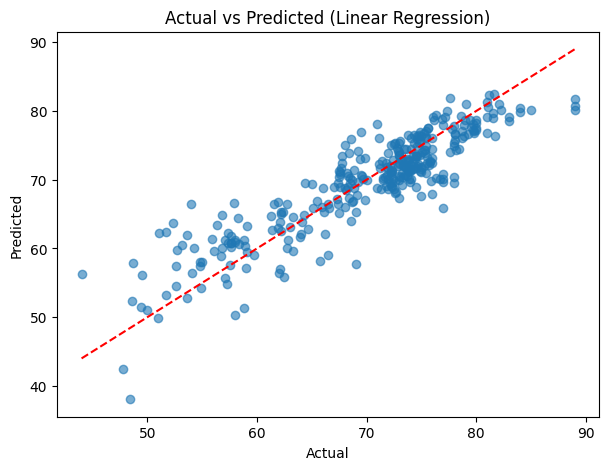

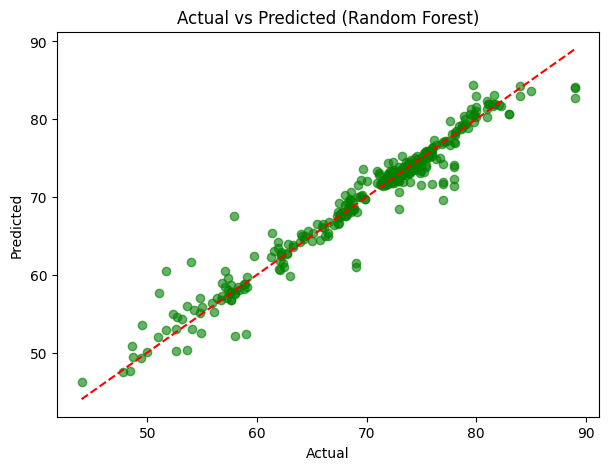

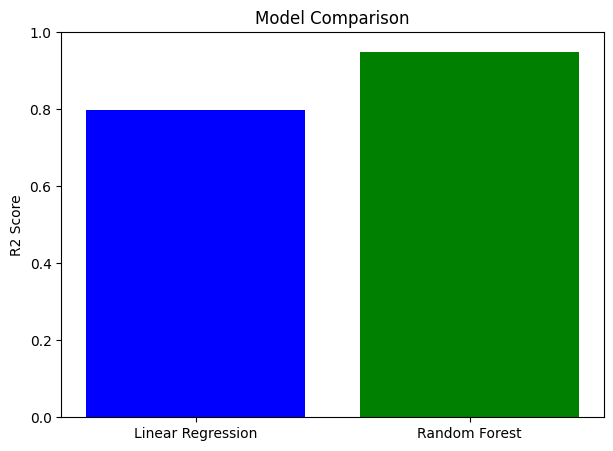

In [ ]:

# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# 2. Load Dataset

df = pd.read_csv("/content/LifeExpectancy.csv")
df.columns = df.columns.str.strip()

# Remove missing values
df = df.dropna()
df = df.drop("Country", axis=1)
# Encode Status (Developed / Developing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])


# 3. HEATMAP of ALL FEATURES

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of All Features")
plt.show()

# 4. SELECT HIGHLY CORRELATED FEATURES

target = "Life expectancy"

corr_with_target = df.corr()[target].abs().sort_values(ascending=False)

print("\nTop Features Correlated with Life Expectancy:\n")
print(corr_with_target)

# Select features with correlation > 0.4 (you can adjust threshold)
selected_features = corr_with_target[corr_with_target > 0.4].index.tolist()

# Remove the target itself from the feature list
selected_features.remove(target)

print("\nSelected Features for Training:\n")
print(selected_features)

# 5. Prepare Data for Model

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


# 7. Train Random Forest

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 8. Model Evaluation
print("\n---- Linear Regression ----")
print("R2 Score:", r2_score(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))

print("\n---- Random Forest ----")
print("R2 Score:", r2_score(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))


# 9. ACTUAL vs PREDICTED PLOTS

plt.figure(figsize=(7,5))
plt.scatter(y_test, lr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# 10. MODEL COMPARISON

scores = [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)]
models = ["Linear Regression", "Random Forest"]

plt.figure(figsize=(7,5))
plt.bar(models, scores, color=["blue", "green"])
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()
